The deadline for this homework is on **06.05.2022 16:00** (right before the practice session). After completing the exercises, you should

1. Download this file into your computer (`File` $\to$ `Download .ipynb`)

2. Download the python files (`.py`) (*if there are any attached to the homework that you need to complete*). 

3. Compress the above files (`.zip` `.rar`) and name the compressed file in the following way *HWx_NameSurname* (for example `HW1_NorayrGalikyan.zip`)

4. Send the compressed file to this email address `fast.1991.ml@gmail.com` with subject **ML1**

**Note**

* if you do not follow any of the above conditions, your homework will not be graded.

* you do not need to send any dataset files or helper scripts that I provide with your homework (since I already have them).

* you need to write the code for the exercises yourself; you can use ``built-in functions``, ``numpy``, ``pandas``
and ``matplotlib``. Use of other libraries or packages (e.g., scikit-learn) will result in points deducted.

Before starting the exercises, make sure you upload all the necessary files into Colab. Here is the list of files needed for this set of tasks (located in the Drive ``Homeworks/HW_files/hw1.zip``):

* plotting_utils.py
* synthetic1_train.csv
* synthetic1_test.csv
* synthetic2_train.csv
* synthetic2_test.csv
* wine_train.csv
* wine_test.csv



Run the below code snippet in order to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotting_utils import plot_decision_boundaries

First, you need to code a basic linear (minimum-distance-to-class-means) classifier, using Euclidean
distance (L2 norm). You will then use the classifier on provided data.

Your code should  

* take as input a set of data points (training dataset) that are labeled
according to class

* should calculate a representation of the classifier (class means and a
way to use them to classify data points). 

* calculate the error rate obtained when classifying
training data (once the classifier is “trained” => class means are
calculated)

* calculate the error rate obtained when classifying test data. 

*Error rate is
defined as the number of misclassified data points divided by the total number of data points
classified, usually expressed as percentage.* 

In addition, with the aid of the supplied plotting
function (``plot_decision_boundaries``), you will plot the training data points, resulting class means, decision boundaries,
and decision regions.

In [2]:
class BasicLinearClassifier:
  """
  Class that implements the Basic Linear Classifier
  it should support binary and multiclass classification
  """
  def fit(self, x_train, y_train):
    """
    Method for model fitting, which in this case means 
    calculating the class means (centroids) and storing them
    for later usage in 'predict' method. 
    :param x_train: nd array of size (nr_data_points, nr_features)
    :param y_train: nd array of size (nr_data_points,)
    """
    # YOUR CODE STARTS HERE
    # Hints: you might want to define object attributes
    # for class_labels, class_means, but you are free to store 
    # any other attributes
    # YOUR CODE ENDS HERE
    self.class_labels = np.unique(y_train)
    class_means = []
    for i in range(len(self.class_labels)):
      class_means.append(
          x_train[y_train == self.class_labels[i], :].mean(axis=0))
    self.class_means = np.array(class_means)
  
  def predict(self, x_test):
    """
    Model for performing predictions on the given data points
    using the class means.
    :param x_test: nd array of size (nr_data_points, nr_features)
    :returns: nd array of size (nr_data_points,)
    """
    # YOUR CODE STARTS HERE
    # Hints: your code should return the predicted labels
    # YOUR CODE ENDS HERE
    predictions = []
    for i in range(x_test.shape[0]):
      d = np.sqrt(np.sum(np.square(x_test[i] - self.class_means), axis=1))
      predictions.append(self.class_labels[np.argmin(d)])
    return np.array(predictions)

In [3]:
def error_rate(y_true, y_pred):
  """
  Calculates the error rate of the predictions.
  :param y_true: nd array of size (nr_data_points,)
  :param y_pred: nd array of size (nr_data_points,)
  """
  # YOUR CODE STARTS HERE
  # Hints: y_true is the vector of actual labels
  # and y_pred is the output of the model's predict method
  # YOUR CODE ENDS HERE  
  return sum(y_true != y_pred) / len(y_true)

**Problem1.** For each of the two synthetic datasets (``synthetic1_{train}{test}.csv`` and ``synthetic2_{train}{test}.csv``), there are in total C=2 classes and D=2
features. For each synthetic dataset: 

1. train the classifier, plot the (training-set) data
points, the resulting class means, decision boundaries, and decision regions (using the ``plot_decision_boundaries`` function from ``plotting_utils.py``)

2. run the trained classifier to classify the training data points (training set) and testing data points (test set)

3. give the classification error rate on the training set, and separately give
the classification error rate on the test set. The test-set data points should never be
used for training. 

**Hint:** You might want to check your code first, by trying it out with just two or three
training data points in each class, for which you can check the results.

In [4]:
# YOUR CODE HERE
def read_data(path):
  data = pd.read_csv(path, header=None)
  data = data.values
  x = data[:, :-1]
  y = data[:, -1]
  return x, y

In [5]:
x_train1, y_train1 = read_data('synthetic1_train.csv')
x_test1, y_test1 = read_data('synthetic1_test.csv')
x_train2, y_train2 = read_data('synthetic2_train.csv')
x_test2, y_test2 = read_data('synthetic2_test.csv')

In [6]:
model1 = BasicLinearClassifier()
model1.fit(x_train1, y_train1)
pred_train1 = model1.predict(x_train1)
pred_test1 = model1.predict(x_test1)
print('1->','Train:',error_rate(y_train1, pred_train1)*100,'%',
                'Test:',error_rate(y_test1, pred_test1)*100,'%')

model2 = BasicLinearClassifier()
model2.fit(x_train2, y_train2)
pred_train2 = model2.predict(x_train2)
pred_test2 = model2.predict(x_test2)
print('2->','Train:',error_rate(y_train2, pred_train2)*100,'%',
                'Test:',error_rate(y_test2, pred_test2)*100,'%')


1-> Train: 21.0 % Test: 24.0 %
2-> Train: 3.0 % Test: 4.0 %


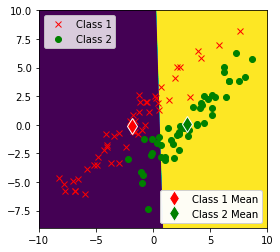

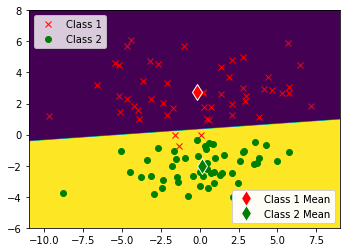

In [7]:
plot_decision_boundaries(x_train1, y_train1, model1.class_means)
plot_decision_boundaries(x_train2, y_train2, model2.class_means)

**Question** Is there much difference in error rates between the two synthetic datasets? Why or
why not?


**Answer** 

Գծագրից էլ երևում է, որ առաջինի համար գոյություն ունի ավելի լավ որոշման սահման, ինչը չենք կարող ստանալ տրված գծային դասակարգիչով։ Տարբերությունը տեսանելի է՝ 21% և 3%, սակայն կարելի է ասել, որ երկրորդ ֆայլի համար սխալանքի քիչ ստանալը պատահական է, այսինքն տվյալները ավելի "հարմար" էին բաշխված։



**Problem2.** Now use the “wine” dataset, which is for classifying the cultivar of the grape
plant a wine was made from, given measured attributes (features) of the wine. This dataset is briefly
described [here](http://archive.ics.uci.edu/ml/datasets/Wine).

For the wine dataset, there are in total C=3 classes (grape cultivars) and D=13
features (measured attributes of the wine). In this problem you will use only 2
features for classification. Pick the first two features ( $x_1$ = alcohol content, and $x_2$ =
malic acid content), and repeat the procedure of **Problem1** for this dataset.

In [8]:
x_train, y_train = read_data('wine_train.csv')
x_test, y_test = read_data('wine_test.csv')

Train: 20.224719101123593 %
Test: 22.47191011235955 %


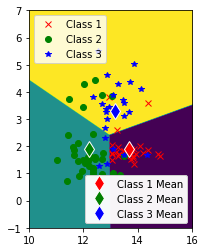

In [9]:
model = BasicLinearClassifier()
model.fit(x_train[:,:2], y_train)

pred_train = model.predict(x_train[:,:2])
pred_test = model.predict(x_test[:,:2])
print('Train:',error_rate(y_train, pred_train)*100,'%')
print('Test:',error_rate(y_test, pred_test)*100,'%')
plot_decision_boundaries(x_train[:,:2], y_train, model.class_means)

**Problem3.** Again for the “wine” dataset, find the 2 features among the 13 that achieve the
minimum classification error on the training set. (We haven’t yet covered how to do feature selection in class, but will later in the semester. 

For this problem, try coming up with your own method - one that you think will give good results - and see how
well it works. 

* Plot the data points and decision boundaries in 2D for your best performing pair of
features, and give its classification error on the training set.

* Then give its classification error on the test set. The purpose of the test set is only to
estimate the error of the final classifier on unknown (previously unseen) data.

* Describe the method you used to choose the best pair of features (inside the **Answer** block).


In [10]:
x_train, y_train = read_data('wine_train.csv')
x_test, y_test = read_data('wine_test.csv')

In [11]:
data = pd.read_csv('wine_train.csv', header=None)
data = data.values
x_train = data[:, :-1]
y_train = data[:, -1]
# data

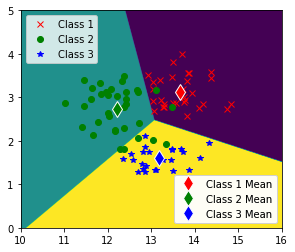

Error rate on training data: 7.865168539325842 %
Error rate on test data: 22.47191011235955 %


In [12]:
model = BasicLinearClassifier()
train,test={},{}

for i in range(x_train.shape[1]):
  #Choose each feature

  for j in range(i+1,x_train.shape[1]):
    # Choose each feature, after previous one

    cur_train=np.vstack((x_train[:,i],x_train[:,j])).T
    cur_test= np.vstack((x_test[:,i], x_test[:,j])).T

    # Training on train data
    model.fit(cur_train, y_train)

    # Create dictionaries of error rates of train and test data
    train[(i,j)]=error_rate(y_train, model.predict(cur_train))
    test[(i,j)]=error_rate(y_test, model.predict(cur_test))

# Finding pair with minimum error rate on train and test
x,y=min(train,key=train.get)
xTrain=np.vstack((x_train.T[x],x_train.T[y])).T

x,y=min(test,key=test.get)
xTest=np.vstack((x_test.T[x],x_test.T[y])).T

model.fit(xTrain, y_train)

plot_decision_boundaries(xTrain, y_train, model.class_means)

print('Error rate on training data:', error_rate(y_train, model.predict(xTrain))*100,'%')
print('Error rate on test data:',  error_rate(y_test, model.predict(xTest))*100,'%')

**Answer**

Առաջին ցիկլով վերցնում ենք x_train-ի յուրաքանչյուր սյունը, երկրորդ ցիկլով ընտրում ենք նախորդ ցիկլում ընտրած սյան ամեն հաջորդ սյունը։ Հետո ամեն զույգի համար հաշվում ենք սխալանքը և ընտրում այն զույգը, որի սխալանքը ամենաքիչն է։

**Problem4.** For the wine dataset, is there much difference in training-set error rate for different
pairs of features? Justify your answer (e.g., by giving the error rate for a few different
example pairs of features; or by giving the standard deviation of error rates over all
possible pairs of features; or by visualizing the histogram of error rates).

Also, answer the same question for the test-set error rate.

In [13]:
for w in sorted(train, key=train.get, reverse=True):
     if train[w]>0.30: 
       print(w, train[w])

(1, 4) 0.5730337078651685
(2, 4) 0.5730337078651685
(4, 7) 0.5730337078651685
(4, 10) 0.5730337078651685
(0, 4) 0.5617977528089888
(4, 5) 0.5617977528089888
(4, 6) 0.5617977528089888
(4, 8) 0.5617977528089888
(4, 11) 0.5617977528089888
(2, 7) 0.5168539325842697
(4, 9) 0.4943820224719101
(2, 3) 0.47191011235955055
(3, 5) 0.47191011235955055
(3, 7) 0.47191011235955055
(3, 10) 0.47191011235955055
(0, 3) 0.449438202247191
(3, 8) 0.449438202247191
(3, 11) 0.43820224719101125
(1, 11) 0.42696629213483145
(3, 4) 0.42696629213483145
(3, 6) 0.42696629213483145
(7, 8) 0.42696629213483145
(1, 8) 0.4044943820224719
(5, 8) 0.4044943820224719
(7, 11) 0.4044943820224719
(10, 11) 0.4044943820224719
(1, 2) 0.39325842696629215
(1, 3) 0.39325842696629215
(1, 10) 0.38202247191011235
(2, 8) 0.38202247191011235
(8, 10) 0.3707865168539326
(5, 7) 0.34831460674157305
(8, 11) 0.34831460674157305
(0, 7) 0.33707865168539325
(7, 10) 0.33707865168539325
(1, 7) 0.3258426966292135
(2, 5) 0.3258426966292135
(5, 10) 0.3

In [14]:
for w in sorted(test, key=test.get, reverse=True):
     if train[w]>0.30: 
       print(w, test[w])

(2, 3) 0.5056179775280899
(3, 7) 0.5056179775280899
(3, 10) 0.5056179775280899
(3, 8) 0.48314606741573035
(3, 5) 0.47191011235955055
(7, 8) 0.47191011235955055
(2, 4) 0.4606741573033708
(4, 7) 0.4606741573033708
(4, 10) 0.4606741573033708
(0, 4) 0.449438202247191
(1, 10) 0.449438202247191
(3, 11) 0.449438202247191
(4, 5) 0.449438202247191
(4, 8) 0.449438202247191
(1, 4) 0.43820224719101125
(4, 9) 0.43820224719101125
(4, 11) 0.43820224719101125
(1, 3) 0.42696629213483145
(3, 6) 0.4157303370786517
(4, 6) 0.4157303370786517
(0, 3) 0.4044943820224719
(2, 8) 0.4044943820224719
(1, 7) 0.39325842696629215
(8, 10) 0.39325842696629215
(1, 2) 0.38202247191011235
(3, 4) 0.38202247191011235
(1, 8) 0.3707865168539326
(1, 11) 0.3707865168539326
(5, 7) 0.3595505617977528
(7, 10) 0.34831460674157305
(2, 7) 0.3258426966292135
(5, 8) 0.3258426966292135
(7, 11) 0.3258426966292135
(10, 11) 0.3258426966292135
(8, 11) 0.3146067415730337
(0, 2) 0.2808988764044944
(0, 7) 0.2808988764044944
(2, 5) 0.2808988764

In [15]:
data1 = pd.read_csv('wine_train.csv', header=None)
data2 = pd.read_csv('wine_test.csv', header=None)
print(data1.head())
print(data2.head())


      0     1     2     3    4     5     6     7     8     9     10    11  \
0  13.75  1.73  2.41  16.0   89  2.60  2.76  0.29  1.81  5.60  1.15  2.90   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.07  1.50  2.10  15.5   98  2.40  2.64  0.28  1.37  3.70  1.18  2.69   
3  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85  7.22  1.01  3.55   
4  13.51  1.80  2.65  19.0  110  2.35  2.53  0.29  1.54  4.20  1.10  2.87   

     12  13  
0  1320   1  
1  1050   1  
2  1020   1  
3  1045   1  
4  1095   1  
      0     1     2     3    4     5     6     7     8     9     10    11  \
0  14.22  3.99  2.51  13.2  128  3.00  3.04  0.20  2.08  5.10  0.89  3.53   
1  12.00  0.92  2.00  19.0   86  2.42  2.26  0.30  1.43  2.50  1.38  3.12   
2  13.67  1.25  1.92  18.0   94  2.10  1.79  0.32  0.73  3.80  1.23  2.46   
3  12.84  2.96  2.61  24.0  101  2.32  0.60  0.53  0.81  4.92  0.89  2.15   
4  11.64  2.06  2.46  21.6   84  1.95  1.69  0.48  1.35  2.80  1.00 

**Answer**

Իմ կարծիքով, նայելով սորտավորած error_rate - երին տեսնում ենք, որ ամենամեծ սղալանքները ունեն այն զույգերը, որոնք իրարից շատ են տարբերվում (օրինակ՝ (1,4) կամ (2,4), որտեղ 1-ը և 2-ը 2-ին մոտ թվեր են, իսկ 4-ը 90-ին)։ Կամ պարզապես 2 feature - ը քիչ է ճիշտ գուշակելու համար։ Նույնը test - ի համար։

In [17]:
# def function(messege,key):
text='a'
ord(text)
for i in text:
  if 32>ord(i) or ord(i)>126: 
    return 1



97